# Simple linear regression

선형모형은 입력 특성에 대한 선형 함수를 만들어 예측을 수행한다.  
선형회귀에서는 최소제곱법을 사용하여 회귀계수를 계산한다.  

**최소제곱법 : 예측값과 훈련세트의 target Y 사이의 평균제곱오차를 최소화하는 회귀계수를 찾는 방법이다.**

## Import the relevant libraries

In [ ]:
# For these lessons we will need NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

## Load the data

In [ ]:
# We start by loading the data
data = pd.read_csv('https://raw.githubusercontent.com/aonekoda/reference/main/data/1.01.%20Simple%20linear%20regression.csv')
# Let's explore the top 5 rows of the df
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


Text(0, 0.5, 'GPA')

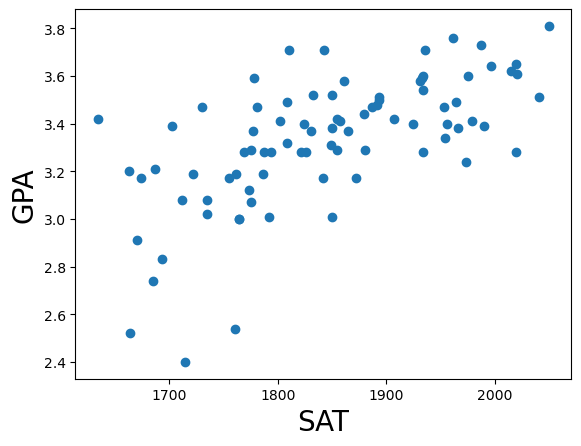

In [ ]:
plt.plot(data['SAT'], data['GPA'], 'o')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)

## Create the regression

### Declare the dependent and independent variables

In [ ]:
# There is a single independent variable: 'SAT'
x = data['SAT']

# and a single depended variable: 'GPA'
y = data['GPA']

In [ ]:
# Often it is useful to check the shapes of the features
x.shape

(84,)

In [ ]:
y.shape

(84,)

In [ ]:
# scikit learn 에서 데이터를 입력으로 사용하기 위해서는 2D 배열을 사용해야 한다.
x_matrix = x.values.reshape(-1,1)

# Check the shape just in case
x_matrix.shape

(84, 1)

### Regression 모형을 생성하자.
참고 문서: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
# We start by creating a linear regression object
reg = LinearRegression()

In [ ]:
# 최소제곱법을 사용하여 회귀 직선식을 생성한다.
# 첫번째 인수는 독립변수를 두번째 인수는 종속변수
reg.fit(x_matrix,y)


LinearRegression()

### R-squared
모형의 설명력은 R 결정계수로 확인한다.   
1에 가까울수록 설명력이 좋은 모형이다.

In [ ]:
# To get the R-squared in sklearn we must call the appropriate method
reg.score(x_matrix,y)

0.40600391479679765

### Coefficients

회귀계수 값을 확인한다.

**회귀계수의 해석**  
회귀계수는 x의 값이 1단위 변경할때 y값이 변하는 정도를 말한다.  
예를 들어 이 예제에서 회귀계수가 0.00167769라는 것은 SAT가 1 증가하면 GPA는 0.00167769변경된다는 뜻이다.

In [ ]:
# Getting the coefficients of the regression
# Note that the output is an array, as we usually expect several coefficients
reg.coef_

array([0.00165569])

### Intercept

In [ ]:
# Getting the intercept of the regression
# Note that the result is a float as we usually expect a single value
reg.intercept_

0.275040299660279

### Making predictions

새로운 값으로 예측을 해보자.

In [ ]:
# There is a dedicated method should we want to predict values
# Note that the result is an array, as we can predict more than one value at a time
reg.predict([[1740]])

array([3.15593751])

In [ ]:
# To be in line with our knowledge so far, we can create a pandas data frame with several different values of SAT
new_data = pd.DataFrame(data=[1740,1760],columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [ ]:
# We can predict the whole data frame in bulk
# Note that the result is an array, this time with 2 elements
reg.predict(new_data.values)

array([3.15593751, 3.18905127])

In [ ]:
# Finally, we can directly store the predictions in a new series of the same dataframe
new_data['Predicted_GPA'] = reg.predict(new_data.values)
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


### 회귀식을 산점도에 그래프로 표현해 보자.

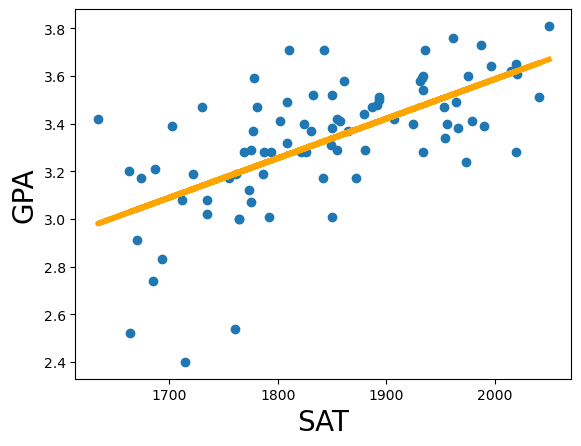

In [ ]:
# There are different ways to plot the data - here's the matplotlib code
plt.scatter(x,y)

# Parametrized version of the regression line
yhat = reg.coef_*x_matrix + reg.intercept_

# Plotting the regression line
fig = plt.plot(x, yhat, lw=4, c='orange', label ='regression line')

# Labelling our axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()